In [2]:
using PyPlot
using Distributions
using StatsBase
using GWASTools
using HDF5

In [3]:
dosage = h5read("../data/samplepop.hdf5", "dosage");

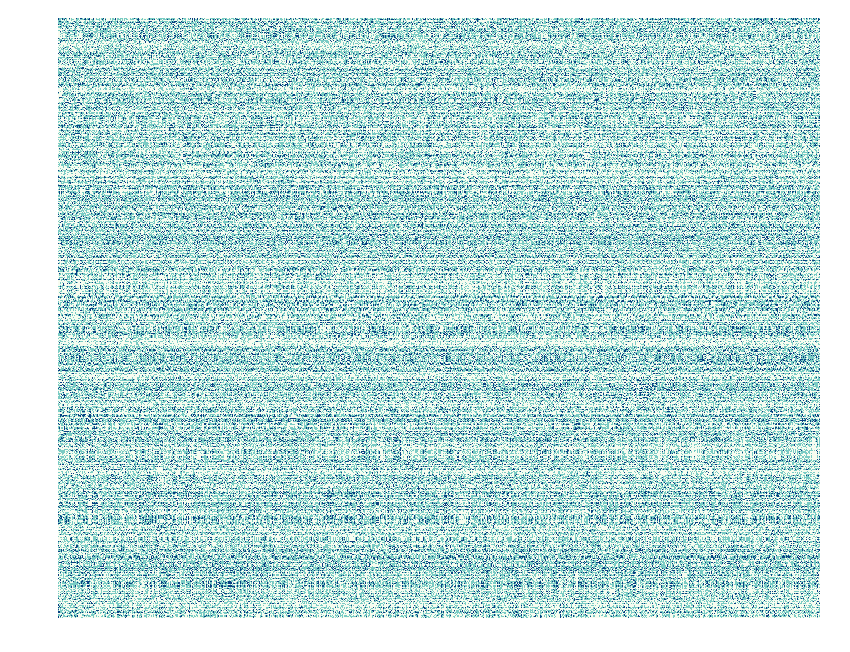

In [4]:
showmatrix(dosage, cmap="GnBu", minmax=[0,2]);

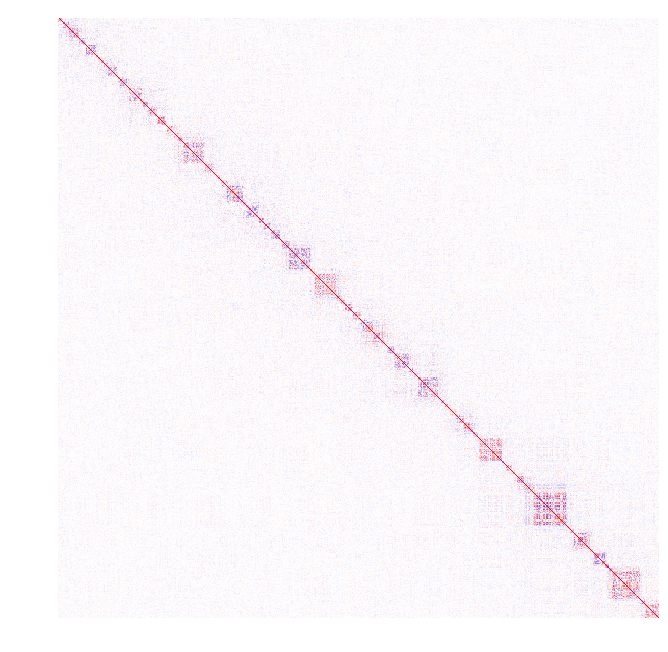

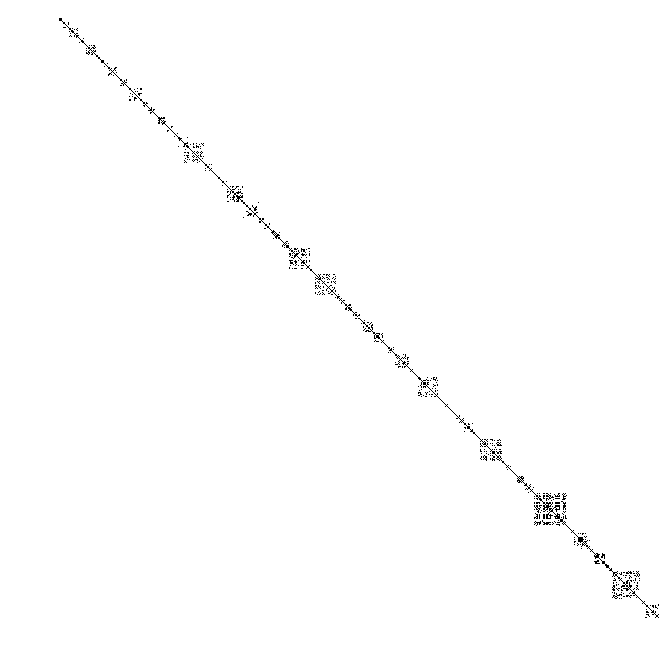

In [5]:
COR =  cor(dosage,2)
LD = COR.^2 .> 0.1
showmatrix(COR, cmap="bwr", minmax=[-1,1]);
showmatrix(LD, minmax=[0,1]);

In [6]:
GWASTools.zygotefreq(dosage)

1576x3 Array{Float64,2}:
 0.536   0.387   0.077 
 0.6195  0.3335  0.047 
 0.381   0.4625  0.1565
 0.39    0.458   0.152 
 0.331   0.4925  0.1765
 0.496   0.423   0.081 
 0.2665  0.486   0.2475
 0.34    0.49    0.17  
 0.513   0.401   0.086 
 0.707   0.2685  0.0245
 0.311   0.4885  0.2005
 0.4255  0.467   0.1075
 0.584   0.3535  0.0625
 ⋮                     
 0.5895  0.3585  0.052 
 0.574   0.3705  0.0555
 0.6515  0.315   0.0335
 0.2925  0.5125  0.195 
 0.2945  0.506   0.1995
 0.3925  0.4795  0.128 
 0.3685  0.485   0.1465
 0.651   0.3135  0.0355
 0.439   0.4585  0.1025
 0.2505  0.504   0.2455
 0.7945  0.1935  0.012 
 0.258   0.5045  0.2375

calculating GWAS z-scores ...100% Time: 0:00:01

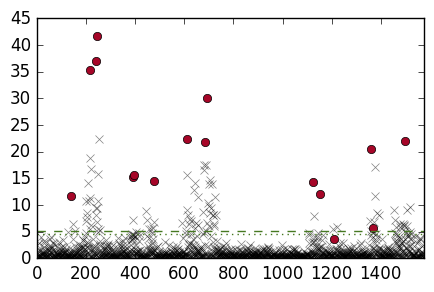

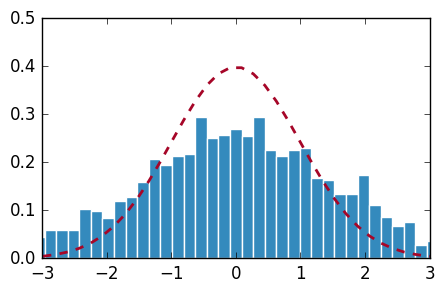

In [39]:
function assign_cases(dosage::Matrix, risksnpfraction::Float64, casesfraction::Float64)
    Nsnp, Nind = size(dosage)
    Nrisk = Int(round(risksnpfraction*Nsnp))
    
    riskind = sample(1:Nsnp,Nrisk,replace=false)
    risk = zeros(Float64,Nsnp)
    risk[riskind] = rand(Nrisk) + 1

    score = Array(Float64,Nind)
    for i in 1:Nind
        score[i]=dot(risk, dosage[:,i])
    end 

    casesind = sortperm(score, rev=true)[1:Int(casesfraction*Nind)]
    cases = zeros(Bool,Nind)
    cases[casesind] = true 
    
    risk, cases
end

risk, cases = assign_cases(dosage, 0.01, 0.5);
zscores = GWAS(dosage, cases);
manhattanplot(zscores, risk .> 0);
zhist(zscores);

In [40]:
mockzscores = GWAS(dosage,rand(size(dosage)[2]).> 0.5);
manhattanplot(mockzscores);
zhist(mockzscores);

LoadError: LoadError: step-halving failed at beta0 = [0.015057790208305364,0.004760155722183299]
while loading In[40], in expression starting on line 1

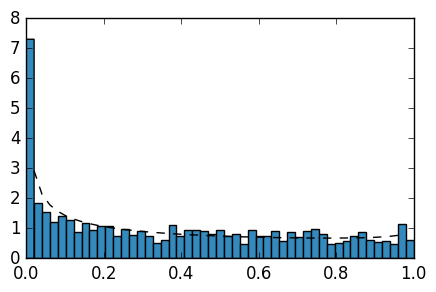

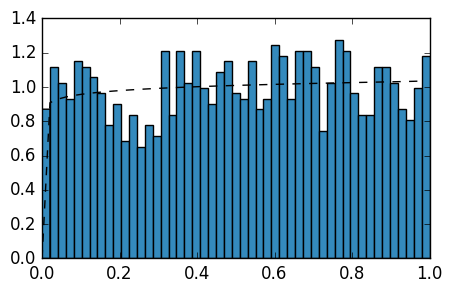

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3359eae80>

In [13]:
probhist(z2p(zscores))
probhist(z2p(mockzscores))

In [42]:
function prune(zscores::Vector{Float64}, LDmat)
    
    
end

LoadError: LoadError: UndefVarError: prune not defined
while loading In[42], in expression starting on line 1

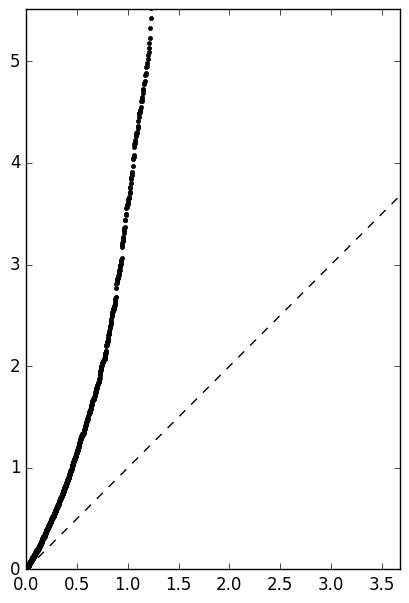

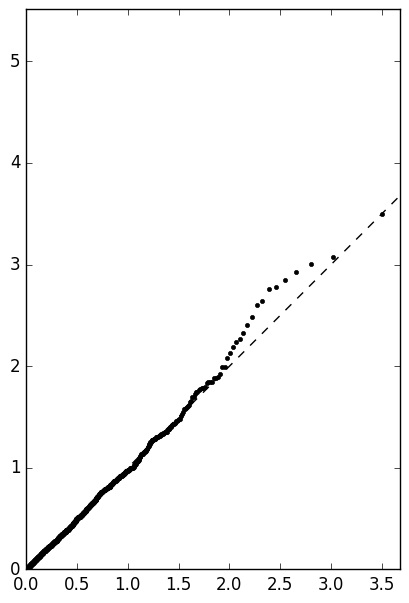

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ee25fd0>

In [41]:
function qqplot(zscores::Vector{Float64})
    N = length(zscores)
    x = -log10(reverse(uniform_quantile(N)))
    y = sort(-log10(z2p(zscores)))
    
    xmax = x[end] * 1.05
    
    fig = plt[:figure](figsize=(7,7))
    ax = fig[:add_subplot](111)
    ax[:set_aspect]("equal")
    ax[:set_ylim]([0,1.5*xmax])
    ax[:set_xlim]([0,xmax])
    ax[:plot](x,y,".", color="k")
    ax[:plot]([0,10],[0,10],"--k")
end

qqplot(zscores)
qqplot(mockzscores)

In [23]:
zscores

1576-element Array{Float64,1}:
  0.775474 
 -0.422593 
  1.37722  
  0.449332 
 -1.12513  
  0.773123 
  1.18533  
 -1.03142  
  0.623486 
 -0.13014  
  1.36033  
 -0.612417 
 -0.109611 
  ⋮        
  2.06908  
  1.60013  
 -0.974568 
  2.03611  
 -0.385297 
  2.03058  
  2.8139   
  0.926998 
 -0.102505 
  3.16969  
  0.0507418
  0.413122 

In [ ]:
Distributions.quantile(Uniform(),)